**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    


<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:


import Q1py as uf 

# style ggplot of matplotlib
plt.style.use('ggplot')

# Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# Local modules
import Q1py as uf
from Q1py import *

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

***Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.*

Note that the symbol $\tilde{w}$ is displayed as $\bar{w}$ due to certain limitations in the sympy libary used.

In [2]:
# In your notebook:
optimal_labor_eq = uf.calculate_optimal_labor_supply()
print(f'This gives an optimal labor supply choice which is equivalent to what was given in the question:')
optimal_labor_eq

This gives an optimal labor supply choice which is equivalent to what was given in the question:


Eq(L^*, (-kappa*nu + sqrt(nu*(4*alpha*conjugate(w)**2 + kappa**2*nu)))/(2*nu*conjugate(w)))

***Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.*

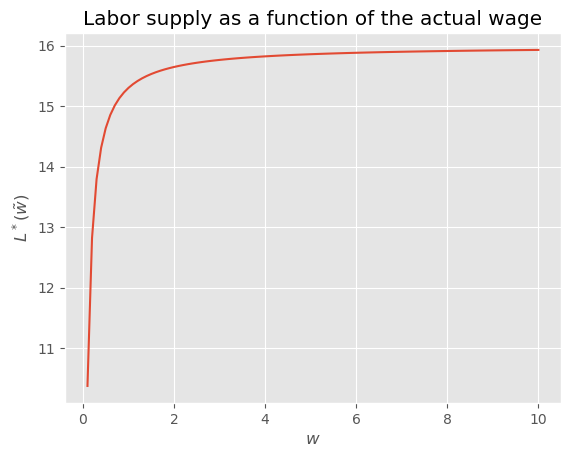

In [3]:
# 1. turning into a python function
L_star_func = calculate_optimal_labor_supply_func_2(optimal_labor_eq)

# 2. unpacking parameters
par = uf.par

# plotting
uf.plot_labor_supply(L_star_func, par)


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

***Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.*


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (1/2)*(-kappa*nu + sqrt(nu*(4*_Dummy_31**2*alpha + kappa**2*nu)))/(_Dummy_31*nu)
C:\Users\sbang\AppData\Local\Temp\ipykernel_20072\831228617.py:15: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2


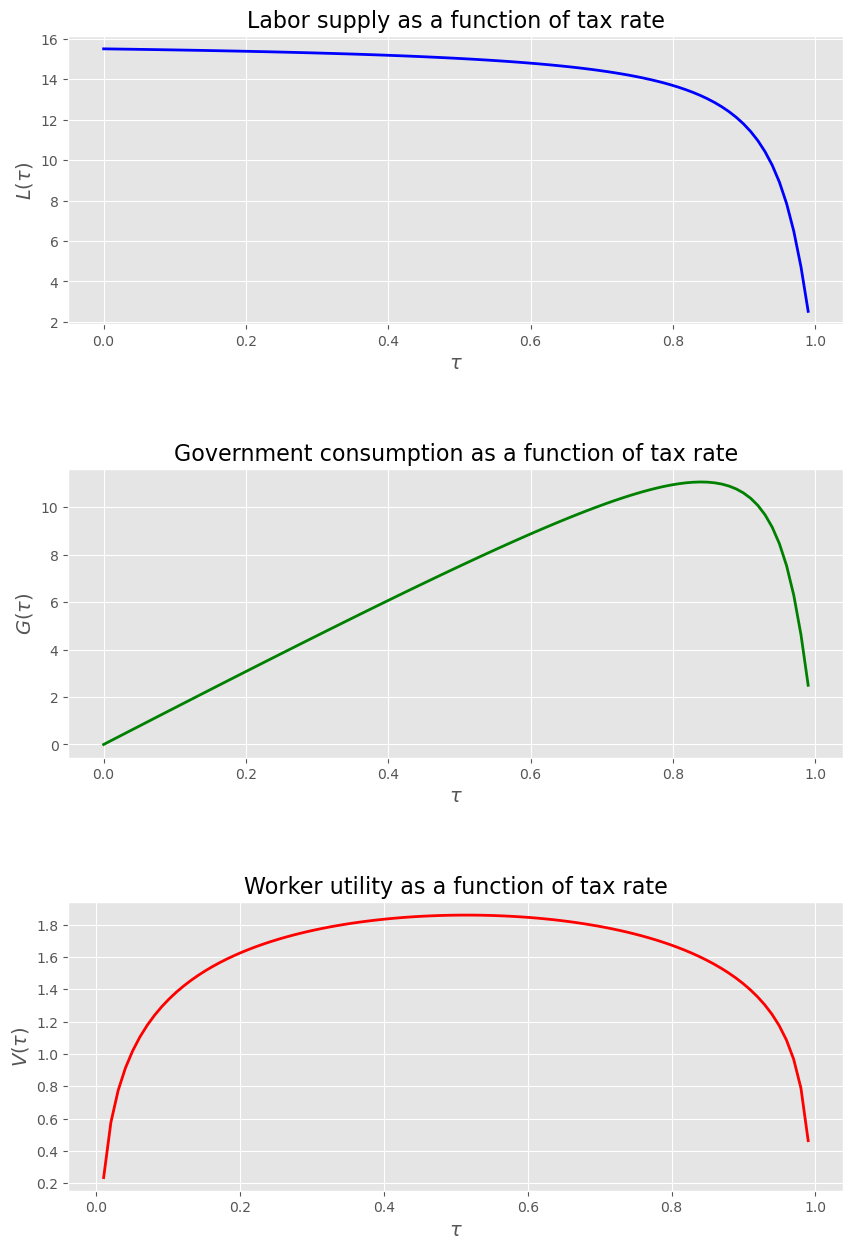

In [4]:
# Define function for labor supply and government consumption
def L_star(tau, w=par.w_val, kappa=par.kappa_val, alpha=par.alpha_val, G=par.G_val, nu=par.nu_val):
    tilde_w = (1 - tau) * w
    return L_star_func(kappa, alpha, G, nu, tilde_w)

def G_func(tau, w=par.w_val, L_func=L_star):
    return tau * w * L_func(tau)

# Define function for worker utility
def V(tau, w=par.w_val, kappa=par.kappa_val, alpha=par.alpha_val, G_func=G_func, L_func=L_star, nu=par.nu_val):
    tilde_w = (1 - tau) * w
    L = L_func(tau)
    C = kappa + tilde_w * L
    G = G_func(tau)
    return np.log(C**alpha * G**(1-alpha)) - nu*L**2/2

# Grid of tau values
tau_values = np.linspace(0, 1, 100)

# Calculate labor supply, government consumption and worker utility for each tau
L_values = [L_star(tau) for tau in tau_values]
G_values = [G_func(tau) for tau in tau_values]
V_values = [V(tau) for tau in tau_values]

# Plot labor supply, government consumption and worker utility
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Adjust the vertical spacing between plots
fig.subplots_adjust(hspace=0.5)

ax[0].plot(tau_values, L_values, color='blue', linewidth=2)
ax[0].set_xlabel(r'$\tau$', fontsize=14)
ax[0].set_ylabel(r'$L(\tau)$', fontsize=14)
ax[0].set_title('Labor supply as a function of tax rate', fontsize=16)
ax[0].grid(True)

ax[1].plot(tau_values, G_values, color='green', linewidth=2)
ax[1].set_xlabel(r'$\tau$', fontsize=14)
ax[1].set_ylabel(r'$G(\tau)$', fontsize=14)
ax[1].set_title('Government consumption as a function of tax rate', fontsize=16)
ax[1].grid(True)

ax[2].plot(tau_values, V_values, color='red', linewidth=2)
ax[2].set_xlabel(r'$\tau$', fontsize=14)
ax[2].set_ylabel(r'$V(\tau)$', fontsize=14)
ax[2].set_title('Worker utility as a function of tax rate', fontsize=16)
ax[2].grid(True)

# Display the plot
plt.show()

***Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.*

The optimal tax rate is: 0.51


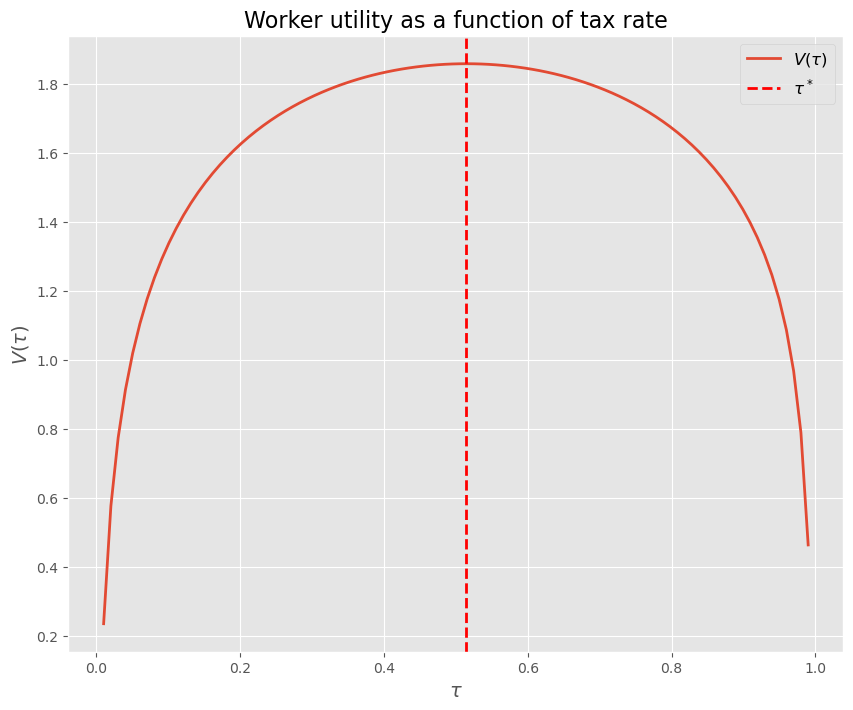

In [6]:
# Define the objective function as the negative of the worker utility function
objective_func = lambda tau: -V(tau)

# Initial guess for tau
tau_initial_guess = 0.5

# Optimize
result = minimize(objective_func, tau_initial_guess, bounds=[(0, 1)])

# Retrieve the optimal tax rate
tau_star = result.x[0]

# Print the optimal tax rate
print(f"The optimal tax rate is: {tau_star:.2f}")

# Plot worker utility as a function of tax rate with the optimal tax rate
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(tau_values, V_values, linewidth=2)
ax.axvline(x=tau_star, color='r', linestyle='--', linewidth=2)
ax.set_xlabel(r'$\tau$', fontsize=14)
ax.set_ylabel(r'$V(\tau)$', fontsize=14)
ax.set_title('Worker utility as a function of tax rate', fontsize=16)
ax.grid(True)
ax.legend([r'$V(\tau)$', r'$\tau^*$'], fontsize=12)

# Display the plot
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma - 1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

***Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.*

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [7]:
# Find the equilibrium level of G for each parameter set
for i in range(2):
    sigma = par.sigma_values[i]
    rho = par.rho_values[i]
    epsilon = par.epsilon_values[i]
    G_star = G_func_v2(par.tau, rho=rho, sigma=sigma, epsilon=epsilon)
    print(f"For parameter set {i+1} (sigma = {sigma}, rho = {rho}, epsilon = {epsilon}):")
    print(f"The equilibrium level of G is: {G_star:.2f}")

For parameter set 1 (sigma = 1.001, rho = 1.001, epsilon = 1.0):
The equilibrium level of G is: 1.00
For parameter set 2 (sigma = 1.5, rho = 1.5, epsilon = 1.0):
The equilibrium level of G is: 4.86


***Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.*

In [8]:
# Import necessary functions from scipy.optimize
from scipy.optimize import minimize

def optimize_tau(tau_values, G, w=par.w_val, kappa=par.kappa_val, alpha=par.alpha_val, nu=par.nu_val, rho=par.rho_values[0], sigma=par.sigma_values[0], epsilon=par.epsilon_values[0]):
    
    # Define the objective function as the negative of worker utility, since scipy.optimize.minimize
    # will minimize this function and we want to maximize worker utility.
    def objective(tau):
        L = L_star_v2(G, tau, rho, sigma, epsilon)
        return -V_v2(L, G, tau, w, kappa, alpha, nu, rho, sigma, epsilon)

    # Set up the constraint that G = tau * w * L_star
    constraints = ({
        'type': 'eq',
        'fun' : lambda tau: np.array([G - tau * w * L_star_v2(G, tau, rho, sigma, epsilon)])
    })
    
    # Set up the initial guess for tau
    tau_initial_guess = 0.5

    # Perform the optimization
    result = minimize(objective, tau_initial_guess, constraints=constraints)
    
    # Return the optimal tau
    return result.x[0]


In [9]:
def utility_maximizer(tau, *args):
    # Define w and G based on the current tau and L_star_v2
    w = par.w_val
    G = G_func_v2(tau)
    
    # Calculate L_star for the given tau
    L_star = L_star_v2(G, tau)
    
    # Calculate the utility for the current tau
    utility = V_v2(L_star, G, tau)
    
    # The function should return a negative utility because we are going to use a minimization function
    return -utility


def optimize_tau(tau_values):
    # The function will start with an initial guess for tau
    # tau_initial_guess = 0.2
    
    # The bounds for tau are between 0 and 1
    tau_bounds = [(0, 1)]
    
    # Perform the optimization
    result = minimize(utility_maximizer, tau_initial_guess, bounds=tau_bounds, method='SLSQP')
    
    # Return the optimal tau
    return result.x[0]

# Define your tau values range. For example, a list of tau values between 0 and 1.
tau_values = np.linspace(0, 1, 100)

# Call the function to get the optimal tau
tau_optimal = optimize_tau(tau_values)

# Print the optimal tau
print(f"The socially optimal tax rate that maximizes worker utility is {tau_optimal}")



c:\Users\sbang\projects-2023-mathias-emma-S-ren-11\Exam\Q1py.py:93: RuntimeWarning: invalid value encountered in power
  U = (((alpha * C**((sigma-1)/sigma) + (1-alpha) * G**((sigma-1)/sigma))**(sigma/(sigma - 1)))**(1 - rho) - 1)/(1-rho)


The socially optimal tax rate that maximizes worker utility is 0.49906530155141837
